# Assignment 4
### Do three of six.

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

In [3]:
import pandas as pd
import numpy as np

minn = pd.read_csv('/Users/adamchow/Library/CloudStorage/Box-Box/UVA/MSDS/Fall 2025/DS 5030/Assignments/practice1/data/mn_police_use_of_force.csv')
minn

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,NaN,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,NaN,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,NaN,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,NaN,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial


Black - Variance of estimates is: 0.000024
White - Variance of estimates is: 0.000061
Native American - Variance of estimates is: 0.000240


/var/folders/8j/b374spys48z0_v4q1g1pr4bc0000gn/T/ipykernel_75123/1014705725.py:39: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(estimates, ax=ax2, fill=True)
/var/folders/8j/b374spys48z0_v4q1g1pr4bc0000gn/T/ipykernel_75123/1014705725.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(race_data.notna().astype(int), ax=ax1)
/var/folders/8j/b374spys48z0_v4q1g1pr4bc0000gn/T/ipykernel_75123/1014705725.py:39: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(estimates, ax=ax2, fill=True)


nan - Variance of estimates is: nan
Other / Mixed Race - Variance of estimates is: 0.001168
Asian - Variance of estimates is: 0.001830
Pacific Islander - Variance of estimates is: 0.000000


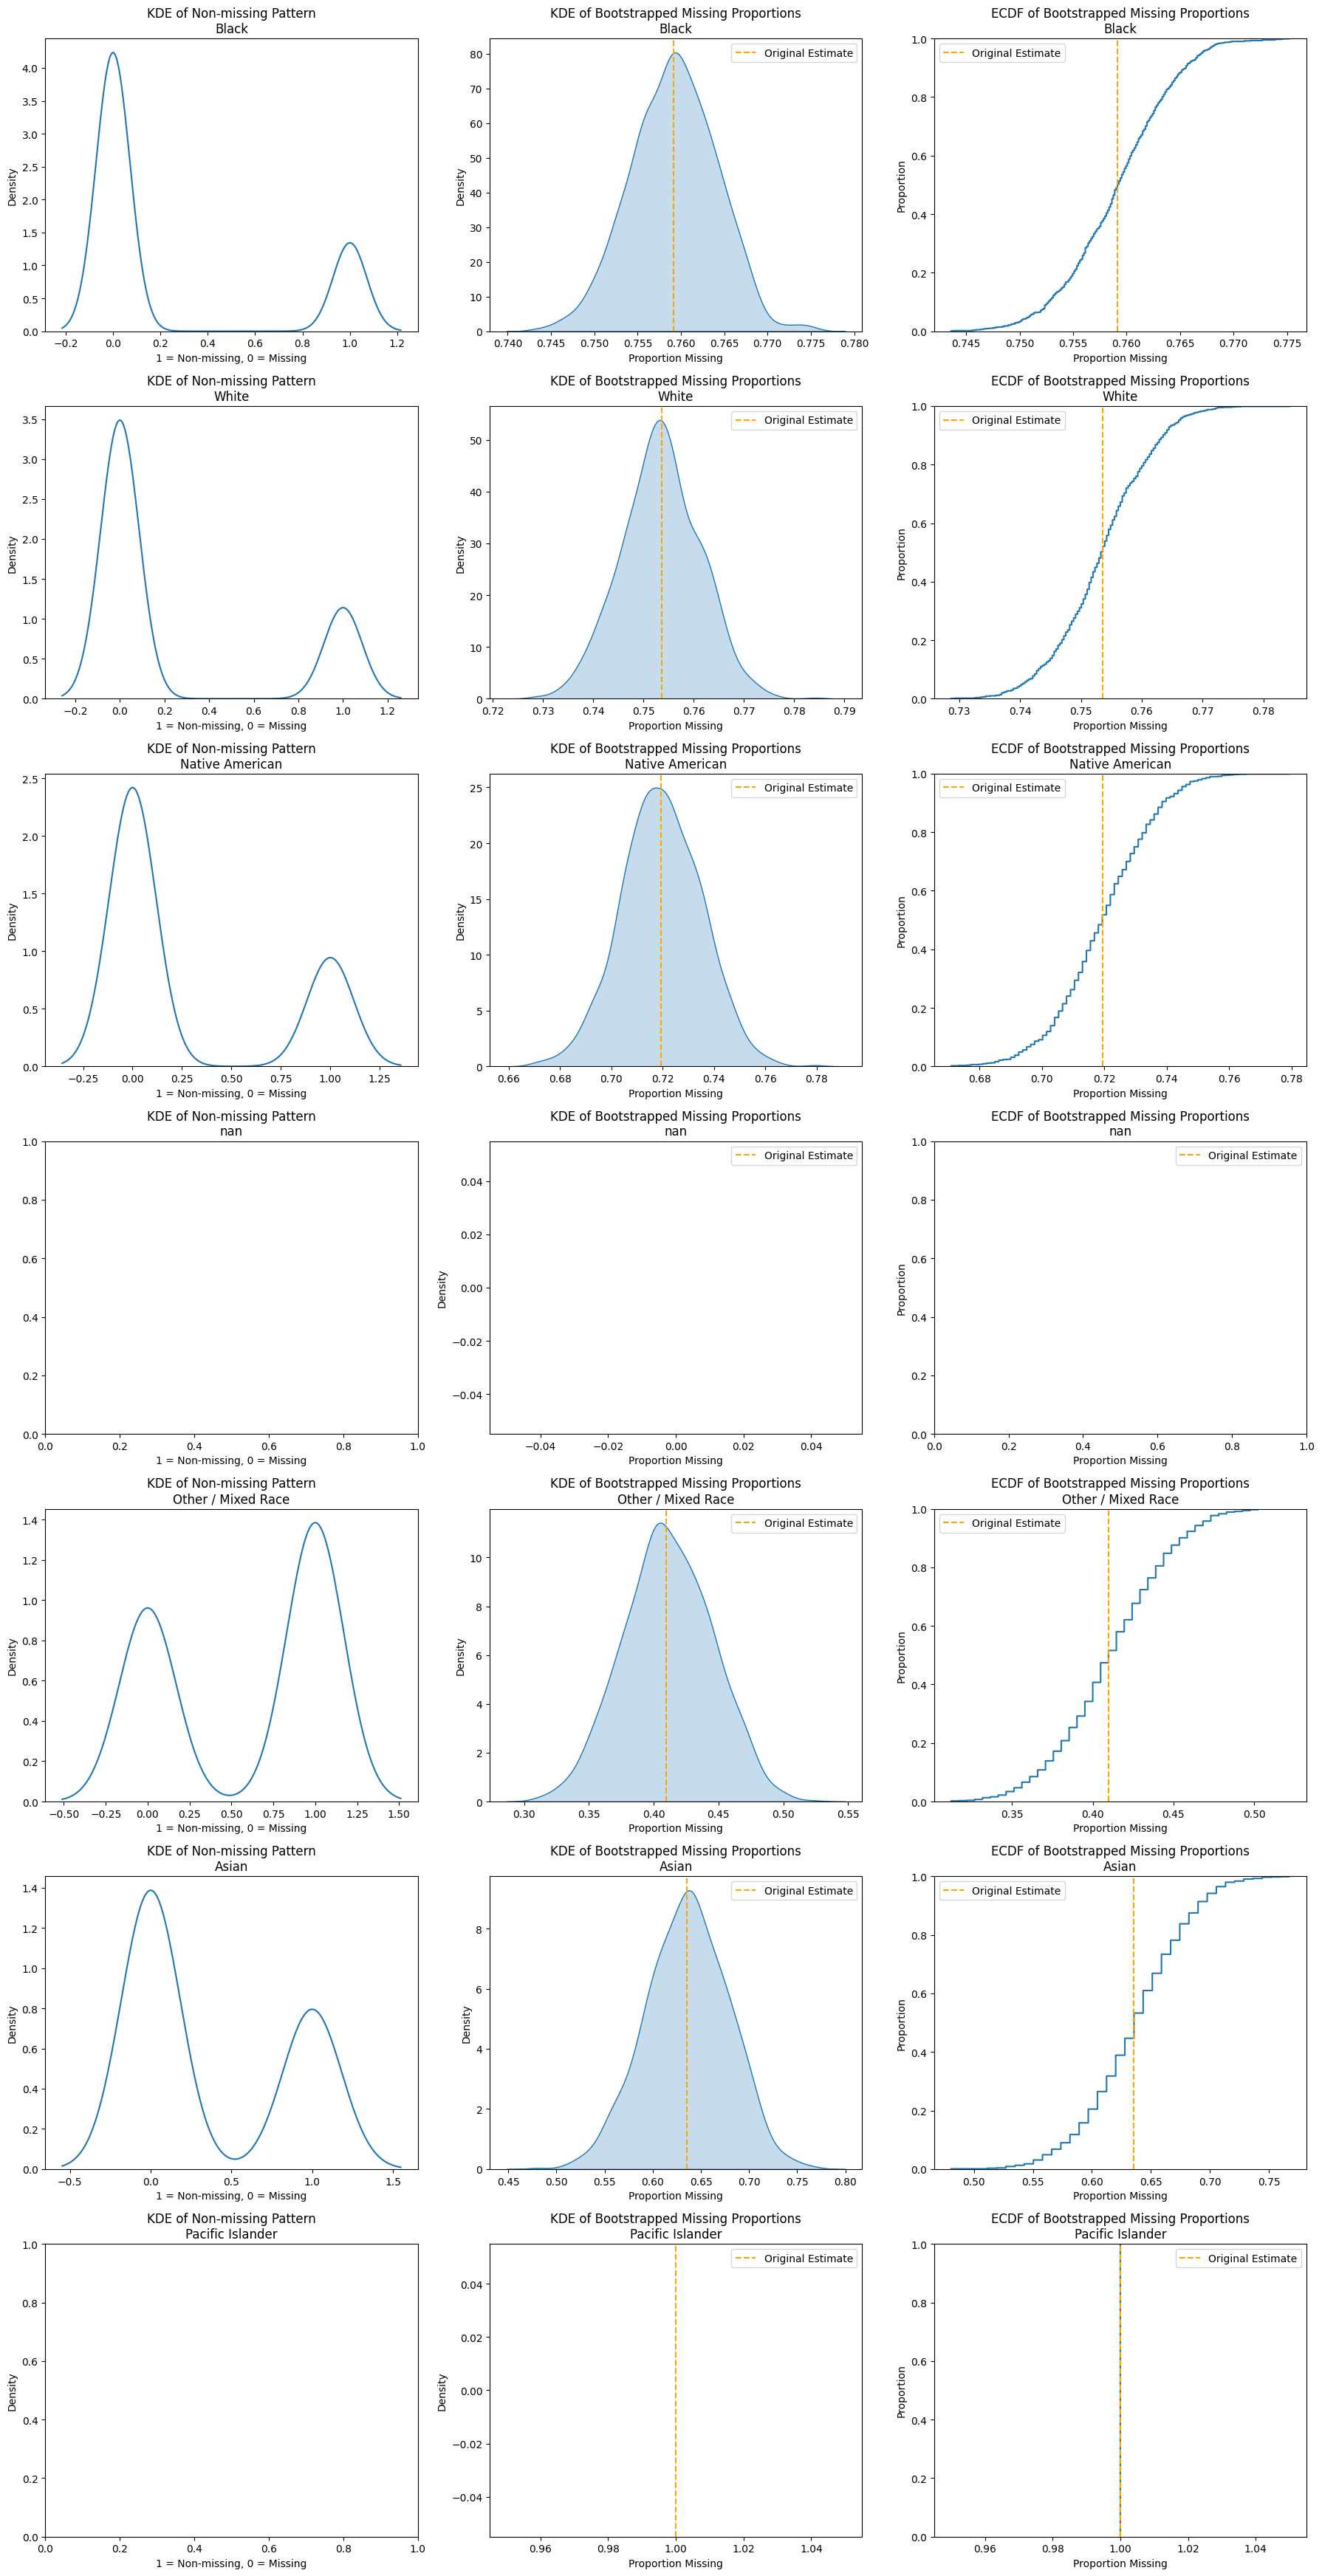

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define Mean
def missing_proportion(x):
    return x.isna().mean()

def simulate_by_race(df, race_var, target_var, fcn, S=1000):
    races = df[race_var].unique()
    
    fig, axes = plt.subplots(len(races), 3, figsize=(18, 5*len(races)))
    
    all_estimates = {}
    
    for i, race in enumerate(races):
        # Filter data for this race
        race_data = df[df[race_var] == race][target_var]
        
        # Bootstrap simulation
        estimates = [fcn(race_data.sample(frac=1.0, replace=True)) for s in range(S)]
        estimates = np.array(estimates)
        all_estimates[race] = estimates
        
        # Plotting

        # KDE
        ax1 = axes[i, 0] if len(races) > 1 else axes[0]
        sns.kdeplot(race_data.notna().astype(int), ax=ax1)
        ax1.set_title(f'KDE of Non-missing Pattern\n{race}')
        ax1.set_xlabel('1 = Non-missing, 0 = Missing')
        
        # KDE of bootstrap estimates
        ax2 = axes[i, 1] if len(races) > 1 else axes[1]
        sns.kdeplot(estimates, ax=ax2, fill=True)
        ax2.axvline(x=fcn(race_data), color='orange', linestyle='--', label='Original Estimate')
        ax2.set_title(f'KDE of Bootstrapped Missing Proportions\n{race}')
        ax2.set_xlabel('Proportion Missing')
        ax2.legend()
        
        # ECDF of bootstrap estimates
        ax3 = axes[i, 2] if len(races) > 1 else axes[2]
        sns.ecdfplot(estimates, ax=ax3)
        ax3.axvline(x=fcn(race_data), color='orange', linestyle='--', label='Original Estimate')
        ax3.set_title(f'ECDF of Bootstrapped Missing Proportions\n{race}')
        ax3.set_xlabel('Proportion Missing')
        ax3.legend()

        print(f'{race} - Variance of estimates is: {np.var(estimates):.6f}')
    
    plt.tight_layout()
    plt.show()
    
    return all_estimates

# Bootstrpa Simulation
race_estimates = simulate_by_race(minn, 'race', 'subject_injury', missing_proportion)

When we account for second-order uncertainty, we are looking at how much variability exists in the sampling distributions themselves, beyond the first-order estimates of missingness. The KDE plots that I've made highlight the shape and spread of these bootstrapped distributions, while the ECDFs show how the probability mass accumulates across possible values.

Across groups, the sampling distributions differ in both tightness and spread. For example, the Black and White groups display relatively narrow distributions centered around their original estimates, which indicates low second-order uncertainty—we can be fairly confident that their missingness proportions are stable. By contrast, groups such as Asian, Native American, and Other/Mixed Race exhibit noticeably wider distributions, reflecting greater variability and less precision in their estimated missingness rates.

Overall, the key insight to me is that not all groups carry the same level of second-order uncertainty. Some groups (Black, White) yield highly reliable estimates, while others (Asian and Other/Mixed in particular) show much more variability, which may complicate inference or comparisons across groups.

### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data
- Use the above function `simulate` to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

In [ ]:
ames = pd.read_csv('/Users/adamchow/Library/CloudStorage/Box-Box/UVA/MSDS/Fall 2025/DS 5030/Assignments/practice1/data/ames_prices.csv')

def simulate(var, df, fcn, S=1000, plot=True):  
    x = df[var] # Extract the variable of interest
    estimates = [] # Initialize empty list to store bootstrap statistics

    # Bootstrap loop: create S bootstrap samples
    for s in range(S):  
        x_s = x.sample(frac=1.0,replace=True) # Draw bootstrap sample with replacement
        stat_s = fcn(x_s) # Compute Statistic
        estimates.append(stat_s) # Store statistic
    estimates = np.array(estimates) 

    # Plotting
    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # Create 1x3 grid

        # Plot 1: Distribution of original data
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data') 

        # Plot 2: KDE of bootstrap estimates
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics') 
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--') 

        # Plot 3: ECDF of bootstrap estimates
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics') 
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--') 
        plt.show() 

        print(f'Variance of estimates is: {np.var(estimates)}') # Print variance
        
    return estimates

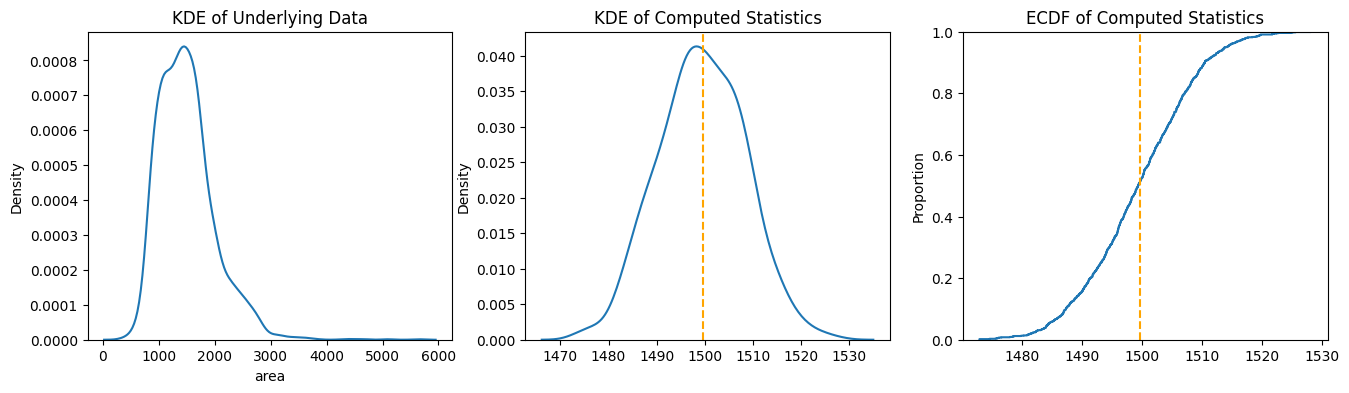

Variance of estimates is: 81.93633171896224


array([1492.27883959, 1508.60819113, 1492.67406143, 1479.8774744 ,
       1505.18600683, 1492.61228669, 1487.95187713, 1514.56245734,
       1510.3331058 , 1491.80307167, 1499.11433447, 1481.26928328,
       1500.53754266, 1496.34197952, 1502.45255973, 1501.23617747,
       1516.79590444, 1500.37167235, 1490.91706485, 1489.46075085,
       1497.59658703, 1497.36313993, 1496.37849829, 1514.73617747,
       1507.59590444, 1499.35631399, 1488.81740614, 1500.33447099,
       1486.99726962, 1504.05836177, 1504.97201365, 1483.16894198,
       1501.22935154, 1494.11672355, 1510.45426621, 1492.39692833,
       1490.16313993, 1499.84539249, 1496.01843003, 1485.58566553,
       1499.72832765, 1501.70102389, 1494.46860068, 1502.25802048,
       1512.52798635, 1513.02832765, 1505.84061433, 1487.60341297,
       1502.57440273, 1507.29351536, 1500.28498294, 1506.28191126,
       1506.19488055, 1500.42150171, 1508.64914676, 1500.80580205,
       1507.27064846, 1488.79010239, 1500.98191126, 1478.03993

In [8]:
var = 'area'
fcn = np.mean
simulate(var, ames, fcn, S=1000, plot=True)

In [10]:
def interval(L, H, df, var, fcn, S=1000): 
    estimates = simulate(var, df, fcn, S=S, plot=False)
    lower = float(np.quantile(estimates, L)) 
    upper = float(np.quantile(estimates, H))
    return round(lower, 3), round(upper, 3)

lower, upper = interval(0.05, 0.95, ames, 'area', np.mean)
print(f"90% CI: ({lower}, {upper})")

90% CI: (1483.772, 1515.453)


### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

#### Study Overivew

The ISCHEMIA-CKD trial is trying to figure out the best way to treat people who have both stable heart disease and advanced kidney problems. The big question is whether it’s better to go in early with a more invasive plan—doing a heart catheterization and then revascularization along with medicines—or to start with medicines alone and only do the procedure later if the medicines aren’t enough. The main thing the researchers are watching is how long it takes until someone dies or has a heart attack. They’re also looking at other important things, like how often people have other heart problems, how much chest pain they feel, how their quality of life changes, and even the costs of treatment. This trial matters because people with bad kidney disease are in a tough spot: they’re more likely to have serious heart issues, but they also face higher risks if they go through invasive procedures. Right now, doctors don’t really agree on what’s best for them, mostly because there hasn’t been strong trial evidence. The hope is that this study will finally give clear answers and help guide care for this very vulnerable group.

#### Study Plan

The ISCHEMIA-CKD trial used a randomized, open-label, parallel design to compare two different ways of treating coronary artery disease in people with advanced kidney disease. Patients were randomly placed into one of two groups so the starting conditions were fair. One group followed an invasive plan, starting with cardiac catheterization and revascularization if possible, along with medicines. The other group followed a conservative plan, using medicines first, with procedures only if medicines didn’t work. Randomization was important here because it removed bias and let researchers make a clear, causal comparison between the two strategies. The main outcome they tracked was death or heart attack over three years. This design allowed the trial to directly test whether one treatment path truly worked better than the other, helping to settle ongoing clinical uncertainty.

#### Results Posted

This table has a standard 2x2 setup, comparing how often a major event (death or heart attack) happened in two treatment groups. The invasive group had 388 patients, with 123 reaching the endpoint, while the conservative group had 389 patients, with 129 events. The rest of the patients—265 in the invasive arm and 260 in the conservative arm—did not experience the event. Laying it out this way makes it easy to compare event rates: 31.7% in the invasive group versus 33.2% in the conservative group. A simple statistical test, like chi-square, can then show whether this small difference is meaningful or just random variation. The table is the basic tool for linking treatment strategy to the main clinical outcome. For the difference in survival rates, from the contingency table, the invasive strategy group had about a 1.5% higher survival rate than the conservative strategy group.

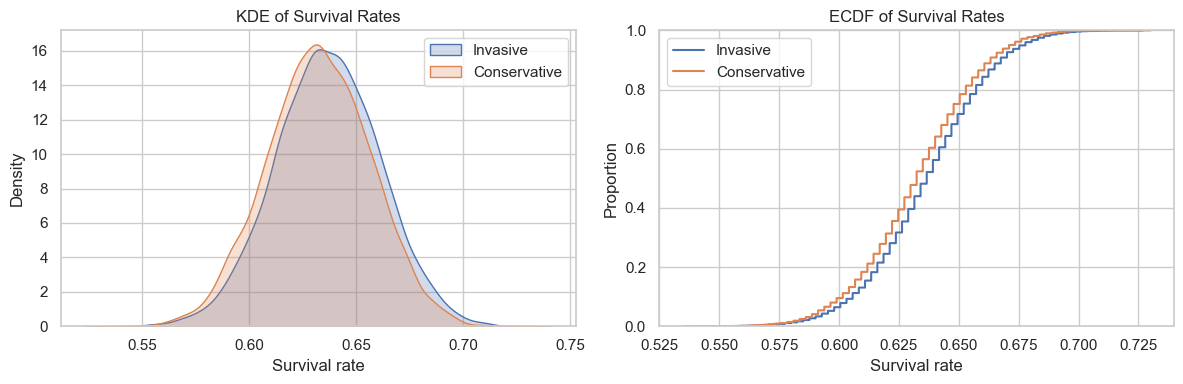

In [11]:
invasive_total, invasive_events = 388, 141
conservative_total, conservative_events = 389, 143

y_inv = np.array([1]*(invasive_total - invasive_events) + [0]*invasive_events)
y_con= np.array([1]*(conservative_total - conservative_events) + [0]*conservative_events)

def bootstrap(y, B=10000, seed=0):
    rng = np.random.default_rng(seed)
    n = len(y)
    draws = rng.integers(0, n, size=(B, n))
    return y[draws].mean(axis=1)

boot_inv = bootstrap(y_inv, B=10000, seed=1)
boot_con = bootstrap(y_con, B=10000, seed=2)

# KDE
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(boot_inv, fill=True, ax=axes[0], label="Invasive")
sns.kdeplot(boot_con, fill=True, ax=axes[0], label="Conservative")
axes[0].set_title("KDE of Survival Rates")
axes[0].set_xlabel("Survival rate")
axes[0].legend()

# ECDF
sns.ecdfplot(boot_inv, ax=axes[1], label="Invasive")
sns.ecdfplot(boot_con, ax=axes[1], label="Conservative")
axes[1].set_title("ECDF of Survival Rates")
axes[1].set_xlabel("Survival rate")
axes[1].legend()
plt.tight_layout()
plt.show()

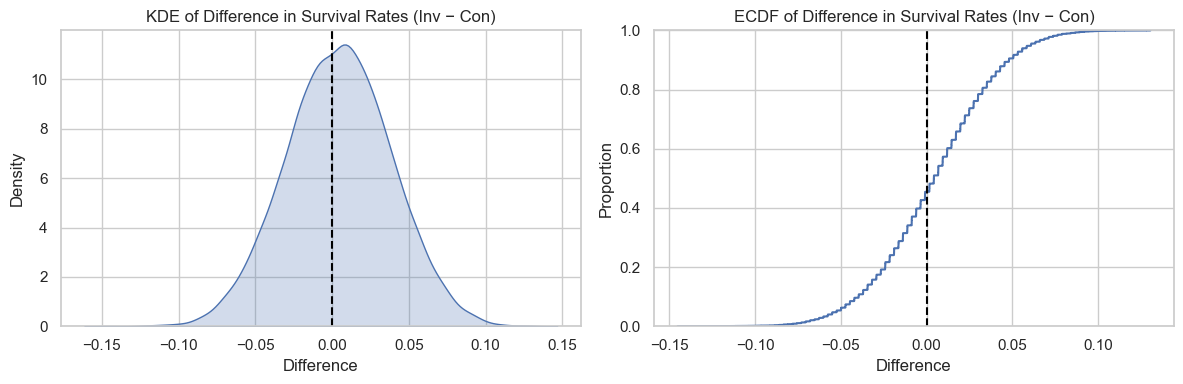

Difference CI (95%): [-0.05241466  0.00422707  0.06080884]
P(Invasive > Conservative): 0.545


In [12]:
boot_diff = boot_inv - boot_con 

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(boot_diff, fill=True, ax=axes[0])
axes[0].axvline(0, ls="--", color="black")
axes[0].set_title("KDE of Difference in Survival Rates (Inv − Con)")
axes[0].set_xlabel("Difference")

sns.ecdfplot(boot_diff, ax=axes[1])
axes[1].axvline(0, ls="--", color="black")
axes[1].set_title("ECDF of Difference in Survival Rates (Inv − Con)")
axes[1].set_xlabel("Difference")
plt.tight_layout()
plt.show()

ci_90 = np.percentile(boot_diff, [5, 50, 95])
p = (boot_diff > 0).mean()
print(f"Difference CI (95%): {ci_90}")
print(f"P(Invasive > Conservative): {p:.3f}")

From my analysis, the invasive strategy does not appear to offer patients a real survival advantage compared to the conservative approach. The survival rates between the two groups are almost identical, and when we account for uncertainty using bootstrapping, the differences essentially wash out to zero. In other words, patients do just as well with medicines alone as they do with an upfront invasive procedure. Since the invasive option comes with higher costs, more risks, and the potential for complications, it doesn’t make much sense to recommend it as the better strategy. 

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?

### Exercise 5
- Extend the `kde` class by adding a method to do bandwidth selection using a simple train-test split
- Extend the `kde` class by adding a method to do bandwidth seleciton by $k$-fold cross validation

### Exercise 6
In this exercise, you're going to do for LCLS what we just did for KDE: Pick the bandwidth 

Recall, the LCLS estimator is
$$
\hat{y}_{N,h}(z) = \dfrac{\frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h} \right)}.
$$
- Select two numeric variables from a data set. Split the data into training and test sets.
- Write a `predict(X_{train},Y_{train},X_{train})` function/method that takes a set of values $X_{test}$ and data $(X_{train},Y_{train})$, and computed predicted values $\hat{y}(X_{test})$ 
- Write a function/method that selects the bandwidth by **minimizing** the **mean squared error** of the squared differences between $\hat{y}(x_j)$ and $y_j$ on the test set:
$$
MSE(h) = \frac{1}{N_{test}} \sum_{j=1}^{N_{test}} (y_j - \hat{y}_{N_{train},h}(x_j))^2
$$
Be sure you understand what's happening here: The training data are used to make predictions for each test observation $x_j$, and then the prediction $\hat{y}(x_j)$ and true value $y_j$ are compared using squared difference